In [1]:
from ase.io import read, write, Trajectory
import numpy as np

In [2]:
def CoM(clus):
    """
    Support function to set the origin of the cluster at the centre of the mass
    """
    (cx, cy, cz) = clus.get_center_of_mass()
    new_xyz = []
    for i, a in enumerate(clus):
        x, y, z = a.position
        x -= cx
        y -= cy
        z -= cz
        new_xyz.append((x, y, z))
    clus.set_positions(new_xyz)
    return clus

In [3]:
def checkSimilar(clus1, clus2):

    """Check whether two clusters are similar or not by comparing their moments of inertia"""
    Inertia1 = clus1.get_moments_of_inertia()
    Inertia2 = clus2.get_moments_of_inertia()
    # print(Inertia1, Inertia2, 'diff: ', Inertia1-Inertia2)

    tol = 0.01
    if (
        Inertia1[0] * (1 - tol) <= Inertia2[0] <= Inertia1[0] * (1 + tol)
        and Inertia1[1] * (1 - tol) <= Inertia2[1] <= Inertia1[1] * (1 + tol)
        and Inertia1[2] * (1 - tol) <= Inertia2[2] <= Inertia1[2] * (1 + tol)
    ):
        similar = True
    else:
        similar = False

    return similar

In [4]:
ini_gen = 0
end_gen = 25

In [5]:
ene_tol = 0.02
dist_tol = 0.02

num_check_similar = 0
diff_dist_abs_sum_list = []

non_similar_clus = []
similar_clus = []
non_similar_clus_ene_list = []
similar_clus_ene_list = []
non_similar_clus_diff_dist = []
similar_clus_diff_dist = []

n_traj1_list = []
n_traj2_list = []

for k in range(ini_gen, end_gen):
    file1  = 'mut_after_relax_gen'+str(k+1)+'.traj'
    file2  = 'vasp_mut_after_relax_gen'+str(k+1)+'.traj'

    traj1 = Trajectory(file1)
    traj2 = Trajectory(file2)
    
    n_traj1 = len(traj1)
    n_traj2 = len(traj2)
    n_traj1_list.append(n_traj1)
    n_traj2_list.append(n_traj2)
    
    for i in range(len(traj1)):
        num_check_similar = num_check_similar + 1
        clus1 = traj1[i]
        clus2 = traj2[i]
        
        ene1 = clus1.get_potential_energy()
        ene2 = clus2.get_potential_energy()
        diff_ene = ene1 - ene2
        
        dist1 = clus1.get_all_distances() 
        dist2 = clus2.get_all_distances()
        diff_dist = dist1 - dist2
        diff_dist_abs = np.absolute(diff_dist)
        diff_dist_avg = np.sum(diff_dist_abs) / len(diff_dist)**2
        
        inertia1 = clus1.get_moments_of_inertia()
        inertia2 = clus2.get_moments_of_inertia()
        diff_inertia = inertia1 - inertia2
              
        if checkSimilar(clus1, clus2) == True:
            #if (diff_dist_avg > dist_tol) or (abs(diff_ene) > ene_tol):
            if diff_dist_avg > dist_tol:
                #if abs(diff_ene) > ene_tol:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                #else:
                    #similar_clus.append((k,i))
                    #similar_clus_ene_list.append(diff_ene)
                    #similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                    
            
            else:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                else:
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                
        else:
            if diff_dist_avg < dist_tol:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                else: 
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
            else:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )

print(len(non_similar_clus))
print(len(similar_clus))
print(num_check_similar)

#print(sorted(non_similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

print(n_traj1_list)
print(n_traj2_list)

(0, 0) 0.40976021522686296 -0.4315561499999987 [ 256.14815339 -446.20598201 -203.16886204]
(0, 1) 0.5876651749086009 -0.29011904000000044 [ 251.38709801 -340.14447907 -138.2784025 ]
(0, 3) 0.04283851684601753 -0.003772479999994971 [-6.39233416 12.29927466 -2.26776449]
(0, 4) 0.31639637148417404 -0.1543835499999986 [-145.61404421  215.10051224   47.2375347 ]
(0, 5) 0.660055984974841 0.41595131000000407 [-511.07482707  850.45690936  327.75620577]
(0, 6) 0.45198085426506796 0.48976118999999585 [-371.78455066  591.7325216   361.69646591]
(0, 8) 0.27263407899455405 0.1827412099999961 [-48.03585976 178.90562887 109.81140783]
(1, 0) 0.6298140270047203 -0.8967633099999972 [ 226.89703121 -636.72014703 -498.87493619]
(1, 1) 0.22602863079665736 0.02882037000000537 [-149.90394005  245.26684736   79.69490131]
(1, 2) 0.20775670246815842 -0.1608985999999959 [-76.74208051  54.35716306  43.91555268]
(1, 3) 0.31661386879063297 -0.8853609300000045 [ 159.45007347  -78.61196379 -480.13674094]
(1, 6) 0.3467

(21, 0) 0.20177489825292094 0.09314123000000052 [ -94.27083616    7.70262542 -144.07075521]
(21, 1) 0.22687900553733548 -0.45873583000000195 [  90.57188453 -204.26957241 -119.7373981 ]
(21, 3) 0.2934250704328863 -0.7053190299999983 [ -21.22647793 -299.19674809 -345.9359457 ]
(21, 4) 0.026793561497556934 -0.0027532099999945103 [-0.77153399  8.36442959 -0.93846082]
(21, 5) 0.24199412228526535 -0.1334250899999958 [ -40.89252742  -63.79836134 -191.02182241]
(21, 6) 0.313105364145999 -0.338551080000002 [ 146.20325713 -143.28948153 -228.92873822]
(21, 7) 0.25728979790577594 -0.053783969999997794 [-284.31178772  534.34506089  226.44151317]
(21, 9) 0.2870825225156924 -0.39896291999999534 [ 170.4106477  -230.29058913   19.66601118]
(22, 2) 0.4750164764296519 -0.01834374999999966 [-208.33015826  129.53912723  -18.65514279]
(22, 5) 0.21908518128318757 -0.2730903499999968 [ 155.85408054 -375.37574285 -326.58860025]
(23, 0) 0.6165326711053275 -0.37537694999999616 [ 227.45007885 -315.64499067 -155.5

In [6]:
filename="clus_Ni10.log"

parent_calls_list = []
with open(filename, 'r') as fh:
    for line in fh:
        if line.startswith("Parent"):
            line = line.strip()
            words = line.split(':')
            words[1] = words[1].lstrip()
            parent_calls_list.append(words[1])
#print(parent_calls_list)
#print((parent_calls_list[0]))

item_split = []
for item in parent_calls_list:
    print( item)
    item_split.append(item.split(","))
#print(item_split)

#print(item_split[0])


[16, 16, 9, 8, 11, 18, 11, 10, 11, 11]
[14, 12, 10, 15, 4, 10, 12, 27, 6]
[6, 13, 13, 5, 16, 6, 9, 7, 14, 13]
[16, 14, 11, 8, 11, 11, 9, 6, 16, 14]
[7, 11, 14, 16, 6, 11, 14, 23, 11]
[13, 29, 13, 7, 13, 11, 13, 13, 9, 5]
[10, 9, 12, 7, 12, 9, 10, 16, 9]
[10, 12, 6, 8, 11, 10, 14, 16]
[29, 10, 6, 6, 5, 9, 12, 10, 12, 17]
[11, 19, 8, 6, 12, 6, 16, 13, 19, 5]
[6, 14, 7, 6, 12, 9, 9, 13]
[9, 11, 15, 8, 14, 17, 11, 5, 15]
[12, 10, 13, 12, 18, 12, 5, 16, 10, 9]
[11, 6, 13, 17, 6, 6, 5, 11]
[6, 25, 9, 13, 12, 20, 10, 12, 11, 14]
[15, 11, 24, 18, 18, 11, 11, 16, 9, 9]
[13, 11, 17, 6, 15, 20, 9, 11, 5, 5]
[16, 12, 18, 13, 11, 9, 6, 15]
[15, 15, 10, 10, 5, 17, 5, 11, 9, 13]
[8, 11, 15, 9, 10, 12, 7, 14, 12, 13]
[5, 12, 7, 7, 8, 5, 13, 8, 9, 20]
[10, 15, 12, 10, 11, 16, 13, 10, 10, 10]
[11, 10, 20, 14, 8, 8, 5, 8, 5, 12]
[26, 9, 8, 7, 11, 25, 12, 14, 10]
[15, 16, 12, 10, 6, 6, 18, 8, 13]


In [7]:
new_vasp_calls = []
len_new_vasp_calls = []
for i in range(len(item_split)):
    k=len(item_split[i])
    new_int_list = []
    
    a = list(item_split[i][0].lstrip())
    del a[0] 
    a = int(''.join(a))
    new_int_list.append(a)
    #print(a)
    for k in range(1,(len(item_split[i])-1)):
        b = int(item_split[i][k])
        new_int_list.append(b)
        #print(b)  
    c = list(item_split[i][-1].lstrip())
    del c[-1]
    c = int(''.join(c))
    new_int_list.append(c)
    #print(c)
    #print(new_int_list)
    len_new_list = len(new_int_list)
    new_vasp_calls.append(new_int_list)
    len_new_vasp_calls.append(len_new_list)
print(new_vasp_calls)
print(len(new_vasp_calls))
print(len_new_vasp_calls)
print(sum(len_new_vasp_calls))

[[16, 16, 9, 8, 11, 18, 11, 10, 11, 11], [14, 12, 10, 15, 4, 10, 12, 27, 6], [6, 13, 13, 5, 16, 6, 9, 7, 14, 13], [16, 14, 11, 8, 11, 11, 9, 6, 16, 14], [7, 11, 14, 16, 6, 11, 14, 23, 11], [13, 29, 13, 7, 13, 11, 13, 13, 9, 5], [10, 9, 12, 7, 12, 9, 10, 16, 9], [10, 12, 6, 8, 11, 10, 14, 16], [29, 10, 6, 6, 5, 9, 12, 10, 12, 17], [11, 19, 8, 6, 12, 6, 16, 13, 19, 5], [6, 14, 7, 6, 12, 9, 9, 13], [9, 11, 15, 8, 14, 17, 11, 5, 15], [12, 10, 13, 12, 18, 12, 5, 16, 10, 9], [11, 6, 13, 17, 6, 6, 5, 11], [6, 25, 9, 13, 12, 20, 10, 12, 11, 14], [15, 11, 24, 18, 18, 11, 11, 16, 9, 9], [13, 11, 17, 6, 15, 20, 9, 11, 5, 5], [16, 12, 18, 13, 11, 9, 6, 15], [15, 15, 10, 10, 5, 17, 5, 11, 9, 13], [8, 11, 15, 9, 10, 12, 7, 14, 12, 13], [5, 12, 7, 7, 8, 5, 13, 8, 9, 20], [10, 15, 12, 10, 11, 16, 13, 10, 10, 10], [11, 10, 20, 14, 8, 8, 5, 8, 5, 12], [26, 9, 8, 7, 11, 25, 12, 14, 10], [15, 16, 12, 10, 6, 6, 18, 8, 13]]
25
[10, 9, 10, 10, 9, 10, 9, 8, 10, 10, 8, 9, 10, 8, 10, 10, 10, 8, 10, 10, 10, 10, 

In [8]:
print(len(similar_clus))
print(similar_clus)

105
[(0, 2), (0, 7), (0, 9), (1, 4), (1, 5), (1, 8), (2, 0), (2, 2), (2, 3), (2, 5), (2, 7), (2, 8), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 4), (4, 8), (5, 3), (5, 7), (5, 8), (5, 9), (6, 1), (6, 2), (6, 3), (6, 5), (6, 8), (7, 2), (7, 3), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 8), (9, 2), (9, 3), (9, 5), (10, 0), (10, 2), (10, 3), (10, 5), (10, 6), (11, 0), (11, 1), (11, 3), (11, 4), (11, 7), (12, 1), (12, 5), (12, 6), (12, 8), (12, 9), (13, 1), (13, 4), (13, 5), (13, 6), (13, 7), (14, 0), (14, 4), (14, 6), (14, 8), (15, 4), (15, 8), (16, 1), (16, 3), (16, 6), (16, 8), (16, 9), (17, 6), (18, 3), (18, 4), (18, 6), (18, 9), (19, 0), (19, 3), (19, 4), (19, 6), (19, 9), (20, 0), (20, 2), (20, 3), (20, 4), (20, 5), (20, 8), (21, 2), (21, 8), (22, 0), (22, 1), (22, 3), (22, 4), (22, 6), (22, 7), (22, 8), (22, 9), (23, 1), (23, 3), (23, 8), (24, 2), (24, 4), (24, 5), (24, 7), (24, 8)]


In [9]:
file_vasp="results_all.log"

vasp_calls = []
vasp_calls_list = []
with open(file_vasp, 'r') as fh:
    total_images = []
    for line in fh:       
        if "VASP Calls" in line:
            line = line.strip()
            words = line.split(':')
            words[1] = int(words[1].lstrip())
            vasp_calls.append(words[1])
        if "Total images in the trajectory" in line:
            line = line.strip()
            img_num = line.split(':')
            img_num[1] = int(img_num[1].lstrip())
            total_images.append(img_num[1])

print(vasp_calls)
#print(len(vasp_calls))
#print(total_images)
#print(len(total_images))
#print(sum(total_images))
print('\n')

kk = 0
for i in total_images:
    traj_calls = []
    for j in range(kk, kk+i):
        traj_calls.append(vasp_calls[j])
    vasp_calls_list.append(traj_calls)
    kk = kk + i

print(vasp_calls_list)

[11, 9, 7, 13, 19, 39, 35, 11, 13, 15, 21, 48, 15, 32, 11, 16, 11, 15, 10, 10, 19, 13, 9, 16, 11, 7, 15, 18, 16, 9, 9, 11, 11, 13, 13, 16, 13, 41, 17, 11, 15, 15, 17, 11, 20, 38, 48, 15, 16, 17, 19, 11, 11, 40, 15, 11, 11, 5, 16, 54, 13, 9, 19, 55, 15, 13, 11, 16, 13, 13, 15, 15, 17, 9, 15, 15, 16, 11, 10, 7, 48, 13, 15, 15, 11, 30, 18, 17, 8, 19, 13, 11, 41, 12, 13, 10, 13, 14, 9, 18, 19, 16, 22, 11, 20, 68, 15, 13, 39, 16, 13, 15, 17, 13, 11, 11, 15, 23, 5, 52, 16, 13, 13, 11, 30, 13, 12, 12, 11, 15, 11, 59, 15, 16, 13, 13, 13, 47, 13, 16, 15, 15, 11, 17, 15, 13, 13, 13, 32, 33, 21, 13, 15, 11, 15, 9, 17, 12, 7, 7, 15, 18, 11, 17, 13, 33, 7, 16, 13, 17, 20, 17, 10, 13, 7, 15, 13, 13, 16, 11, 14, 51, 13, 13, 11, 17, 18, 9, 5, 15, 11, 13, 15, 7, 20, 15, 49, 15, 13, 15, 33, 22, 13, 13, 15, 13, 15, 15, 11, 13, 50, 15, 11, 18, 13, 13, 12, 13, 11, 35, 13, 11, 15, 9, 51, 11, 15, 19, 15, 13, 19, 9, 9, 11, 15, 24]


[[11, 9, 7, 13, 19, 39, 35, 11, 13, 15], [21, 48, 15, 32, 11, 16, 11, 15, 10]

In [10]:
print(new_vasp_calls)

[[16, 16, 9, 8, 11, 18, 11, 10, 11, 11], [14, 12, 10, 15, 4, 10, 12, 27, 6], [6, 13, 13, 5, 16, 6, 9, 7, 14, 13], [16, 14, 11, 8, 11, 11, 9, 6, 16, 14], [7, 11, 14, 16, 6, 11, 14, 23, 11], [13, 29, 13, 7, 13, 11, 13, 13, 9, 5], [10, 9, 12, 7, 12, 9, 10, 16, 9], [10, 12, 6, 8, 11, 10, 14, 16], [29, 10, 6, 6, 5, 9, 12, 10, 12, 17], [11, 19, 8, 6, 12, 6, 16, 13, 19, 5], [6, 14, 7, 6, 12, 9, 9, 13], [9, 11, 15, 8, 14, 17, 11, 5, 15], [12, 10, 13, 12, 18, 12, 5, 16, 10, 9], [11, 6, 13, 17, 6, 6, 5, 11], [6, 25, 9, 13, 12, 20, 10, 12, 11, 14], [15, 11, 24, 18, 18, 11, 11, 16, 9, 9], [13, 11, 17, 6, 15, 20, 9, 11, 5, 5], [16, 12, 18, 13, 11, 9, 6, 15], [15, 15, 10, 10, 5, 17, 5, 11, 9, 13], [8, 11, 15, 9, 10, 12, 7, 14, 12, 13], [5, 12, 7, 7, 8, 5, 13, 8, 9, 20], [10, 15, 12, 10, 11, 16, 13, 10, 10, 10], [11, 10, 20, 14, 8, 8, 5, 8, 5, 12], [26, 9, 8, 7, 11, 25, 12, 14, 10], [15, 16, 12, 10, 6, 6, 18, 8, 13]]


In [11]:
print(similar_clus)

[(0, 2), (0, 7), (0, 9), (1, 4), (1, 5), (1, 8), (2, 0), (2, 2), (2, 3), (2, 5), (2, 7), (2, 8), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 4), (4, 8), (5, 3), (5, 7), (5, 8), (5, 9), (6, 1), (6, 2), (6, 3), (6, 5), (6, 8), (7, 2), (7, 3), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 8), (9, 2), (9, 3), (9, 5), (10, 0), (10, 2), (10, 3), (10, 5), (10, 6), (11, 0), (11, 1), (11, 3), (11, 4), (11, 7), (12, 1), (12, 5), (12, 6), (12, 8), (12, 9), (13, 1), (13, 4), (13, 5), (13, 6), (13, 7), (14, 0), (14, 4), (14, 6), (14, 8), (15, 4), (15, 8), (16, 1), (16, 3), (16, 6), (16, 8), (16, 9), (17, 6), (18, 3), (18, 4), (18, 6), (18, 9), (19, 0), (19, 3), (19, 4), (19, 6), (19, 9), (20, 0), (20, 2), (20, 3), (20, 4), (20, 5), (20, 8), (21, 2), (21, 8), (22, 0), (22, 1), (22, 3), (22, 4), (22, 6), (22, 7), (22, 8), (22, 9), (23, 1), (23, 3), (23, 8), (24, 2), (24, 4), (24, 5), (24, 7), (24, 8)]


In [12]:
same_clus_almlp = []
same_clus_vasp = []
same_clus_diff = []
for i in range(len(similar_clus)):
    p = similar_clus[i][0]
    q = similar_clus[i][1]
    
    r = new_vasp_calls[p][q] #clus_XXX.log AL
    same_clus_almlp.append(r)
    s = vasp_calls_list[p][q] #results.log DFT
    same_clus_vasp.append(s)
    
    same_clus_diff.append(s-r)
    #print(r, s, s-r)
print(same_clus_almlp)
print(sum(same_clus_almlp))
print(same_clus_vasp)
print(sum(same_clus_vasp))
print(same_clus_diff)
print(sum(same_clus_diff))
print(len(same_clus_diff))

[9, 10, 11, 4, 10, 6, 6, 13, 5, 6, 7, 14, 11, 8, 11, 11, 9, 6, 6, 11, 7, 13, 9, 5, 9, 12, 7, 9, 9, 6, 8, 10, 6, 6, 5, 9, 12, 8, 6, 6, 6, 7, 6, 9, 9, 9, 11, 8, 14, 5, 10, 12, 5, 10, 9, 6, 6, 6, 5, 11, 6, 12, 10, 11, 18, 9, 11, 6, 9, 5, 5, 6, 10, 5, 5, 13, 8, 9, 10, 7, 13, 5, 7, 7, 8, 5, 9, 12, 10, 11, 10, 14, 8, 5, 8, 5, 12, 9, 7, 10, 12, 6, 6, 8, 13]
895
[7, 11, 15, 11, 16, 10, 10, 13, 9, 11, 15, 18, 11, 11, 13, 13, 16, 13, 11, 15, 11, 11, 11, 5, 54, 13, 9, 55, 11, 13, 15, 16, 11, 10, 7, 48, 15, 17, 8, 13, 10, 14, 9, 19, 16, 11, 20, 15, 13, 13, 13, 23, 5, 16, 13, 11, 12, 12, 11, 15, 11, 13, 13, 13, 15, 32, 13, 11, 17, 7, 7, 7, 17, 10, 7, 13, 16, 51, 13, 11, 9, 5, 11, 13, 15, 7, 49, 33, 15, 11, 13, 15, 11, 13, 13, 12, 13, 35, 11, 15, 13, 9, 9, 15, 24]
1559
[-2, 1, 4, 7, 6, 4, 4, 0, 4, 5, 8, 4, 0, 3, 2, 2, 7, 7, 5, 4, 4, -2, 2, 0, 45, 1, 2, 46, 2, 7, 7, 6, 5, 4, 2, 39, 3, 9, 2, 7, 4, 7, 3, 10, 7, 2, 9, 7, -1, 8, 3, 11, 0, 6, 4, 5, 6, 6, 6, 4, 5, 1, 3, 2, -3, 23, 2, 5, 8, 2, 2, 1, 7, 5, 2

<AxesSubplot:ylabel='Count'>

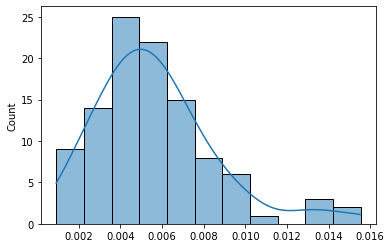

In [13]:
import seaborn as sns
sns.histplot(similar_clus_diff_dist, kde=True)

<AxesSubplot:ylabel='Count'>

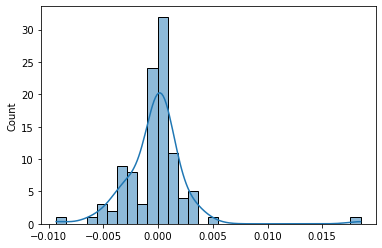

In [14]:
sns.histplot(similar_clus_ene_list, kde=True)

In [15]:
print(sorted(similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

[-0.00932793000000487, -0.006421830000000739, -0.00554044000000431, -0.005302219999997249, -0.004755729999999403, -0.004035809999997753, -0.003994039999994925, -0.003538900000002343, -0.003527949999998725, -0.0034821899999997186, -0.00340334999999925, -0.003333739999995089, -0.0031780200000000036, -0.0030757199999982276, -0.0030757199999982276, -0.0030757099999974002, -0.002807110000006219, -0.002558890000003089, -0.0022707600000018147, -0.002211800000004871, -0.0022004400000028568, -0.002149289999998416, -0.0019850699999963695, -0.00196654999999879, -0.0017609399999969355, -0.0015181500000025494, -0.0015100799999956394, -0.0008720099999948161, -0.0008177499999959537, -0.0007140199999966512, -0.0007122399999985873, -0.000694519999996146, -0.0006315799999967453, -0.0006119899999958989, -0.0006027399999979366, -0.0004595300000005409, -0.0004383099999998308, -0.0003817899999987162, -0.00036593999999467997, -0.0003627099999974348, -0.0003337899999991123, -0.00028653000000389284, -0.0002800

In [16]:
print(sorted(similar_clus_diff_dist))

[0.0009217962498548094, 0.0012894117101090164, 0.0013499977168256638, 0.0017244001294377488, 0.0017854480678385265, 0.0017957298310384662, 0.0018385329502875526, 0.00213431610620054, 0.002243541663472275, 0.0023316348402625396, 0.002337270599945693, 0.002540908336009826, 0.002730848308947076, 0.0027377435075876377, 0.002961702124361869, 0.0029962440277597224, 0.0030716322697446597, 0.0030766794199052062, 0.0031387535881288553, 0.0031482041611806365, 0.0033822070623934055, 0.003393682040522217, 0.0035736642974085343, 0.0036822950049904524, 0.003717485562086349, 0.00372764932344956, 0.0037530477606470126, 0.0038388463131244863, 0.003941720027235398, 0.003982964514948711, 0.0040618882416612314, 0.004117752164436359, 0.0042330753043227, 0.004259826734059065, 0.004269228782528467, 0.00437423039045556, 0.004421586006760494, 0.004429493805479429, 0.004504967980780581, 0.004561919785393939, 0.004565457427719544, 0.004699972845655696, 0.004716407767879715, 0.004727169287275155, 0.00472875340928

In [17]:
import pickle
with open ('Ni10_similar_clus_diff_dist.pkl', 'wb') as fh:
    pickle.dump(similar_clus_diff_dist, fh)
with open ('Ni10_similar_clus_ene_list.pkl', 'wb') as fh:
    pickle.dump(similar_clus_ene_list, fh)